# COVID Global ScratchPad 

Do the same using Global data from John Hopkins University

https://github.com/CSSEGISandData/COVID-19   

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import requests

dfc_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfd_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

dfc_g = dfc_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfc_graw.columns[-1], ascending=False)
dfc_g = dfc_g.transpose()  
dfc_g.index = pd.to_datetime(dfc_g.index)
display('cases',dfc_g.tail())
display('chg in cases',dfc_g.tail().diff(axis=0))

dfd_g = dfd_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfd_graw.columns[-1], ascending=False)
dfd_g = dfd_g.transpose().tail(40)  # last 40 days ?
dfd_g.index = pd.to_datetime(dfd_g.index) 
display('deaths',dfd_g.tail())
display('chg in deaths',dfd_g.tail().diff(axis=0))

#display('details of', dfd_g['Sudan'].tail(15), dfc_g['Sudan'].tail(15))


'cases'

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,Turkey,China,Iran,Russia,...,MS Zaandam,Holy See,Papua New Guinea,Mauritania,Western Sahara,Bhutan,Burundi,Sao Tome and Principe,South Sudan,Yemen
2020-04-15,636350,177644,165155,134582,134753,99483,69392,83356,76389,24490,...,9,8,2,7,6,5,5,4,4,1
2020-04-16,667592,184948,168941,147091,137698,104145,74193,83403,77995,27938,...,9,8,7,7,6,5,5,4,4,1
2020-04-17,699706,190839,172434,149130,141397,109769,78546,83760,79494,32008,...,9,8,7,7,6,5,5,4,4,1
2020-04-18,732197,191726,175925,149149,143342,115314,82329,83787,80868,36793,...,9,8,7,7,6,5,5,4,4,1
2020-04-19,759086,198674,178972,154097,145184,121172,86306,83805,82211,42853,...,9,8,7,7,6,5,5,4,4,1


'chg in cases'

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,Turkey,China,Iran,Russia,...,MS Zaandam,Holy See,Papua New Guinea,Mauritania,Western Sahara,Bhutan,Burundi,Sao Tome and Principe,South Sudan,Yemen
2020-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-16,31242.0,7304.0,3786.0,12509.0,2945.0,4662.0,4801.0,47.0,1606.0,3448.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-17,32114.0,5891.0,3493.0,2039.0,3699.0,5624.0,4353.0,357.0,1499.0,4070.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18,32491.0,887.0,3491.0,19.0,1945.0,5545.0,3783.0,27.0,1374.0,4785.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-19,26889.0,6948.0,3047.0,4948.0,1842.0,5858.0,3977.0,18.0,1343.0,6060.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'deaths'

Country/Region,US,Italy,Spain,France,United Kingdom,Belgium,Iran,China,Germany,Netherlands,...,Cambodia,Sierra Leone,Equatorial Guinea,Laos,Dominica,South Sudan,Chad,Central African Republic,Grenada,Maldives
2020-04-15,28325,21645,18708,17188,12894,4440,4777,3346,3804,3145,...,0,0,0,0,0,0,0,0,0,0
2020-04-16,32916,22170,19315,17941,13759,4857,4869,3346,4052,3327,...,0,0,0,0,0,0,0,0,0,0
2020-04-17,36773,22745,20002,18703,14607,5163,4958,4636,4352,3471,...,0,0,0,0,0,0,0,0,0,0
2020-04-18,38664,23227,20043,19345,15498,5453,5031,4636,4459,3613,...,0,0,0,0,0,0,0,0,0,0
2020-04-19,40661,23660,20453,19744,16095,5683,5118,4636,4586,3697,...,0,0,0,0,0,0,0,0,0,0


'chg in deaths'

Country/Region,US,Italy,Spain,France,United Kingdom,Belgium,Iran,China,Germany,Netherlands,...,Cambodia,Sierra Leone,Equatorial Guinea,Laos,Dominica,South Sudan,Chad,Central African Republic,Grenada,Maldives
2020-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-16,4591.0,525.0,607.0,753.0,865.0,417.0,92.0,0.0,248.0,182.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-17,3857.0,575.0,687.0,762.0,848.0,306.0,89.0,1290.0,300.0,144.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18,1891.0,482.0,41.0,642.0,891.0,290.0,73.0,0.0,107.0,142.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-19,1997.0,433.0,410.0,399.0,597.0,230.0,87.0,0.0,127.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# plot globals?


# Highest Fatality Rates

compare the deaths / cases and find the top -- over a trend line


Country/Region,US,Spain,Italy,France,Germany,United Kingdom,Turkey,China,Iran,Russia,...,MS Zaandam,Holy See,Papua New Guinea,Mauritania,Western Sahara,Bhutan,Burundi,Sao Tome and Principe,South Sudan,Yemen
2020-04-15,4.45,10.53,13.11,12.77,2.82,12.96,2.19,4.01,6.25,0.81,...,22.22,0.0,0.0,14.29,0.0,0.0,20.0,0.0,0.0,0.0
2020-04-16,4.93,10.44,13.12,12.20,2.94,13.21,2.21,4.01,6.24,0.83,...,22.22,0.0,0.0,14.29,0.0,0.0,20.0,0.0,0.0,0.0
2020-04-17,5.26,10.48,13.19,12.54,3.08,13.31,2.25,5.53,6.24,0.85,...,22.22,0.0,0.0,14.29,0.0,0.0,20.0,0.0,0.0,0.0
2020-04-18,5.28,10.45,13.20,12.97,3.11,13.44,2.30,5.53,6.22,0.85,...,22.22,0.0,0.0,14.29,0.0,0.0,20.0,0.0,0.0,0.0
2020-04-19,5.36,10.29,13.22,12.81,3.16,13.28,2.34,5.53,6.23,0.84,...,22.22,0.0,0.0,14.29,0.0,0.0,20.0,0.0,0.0,0.0


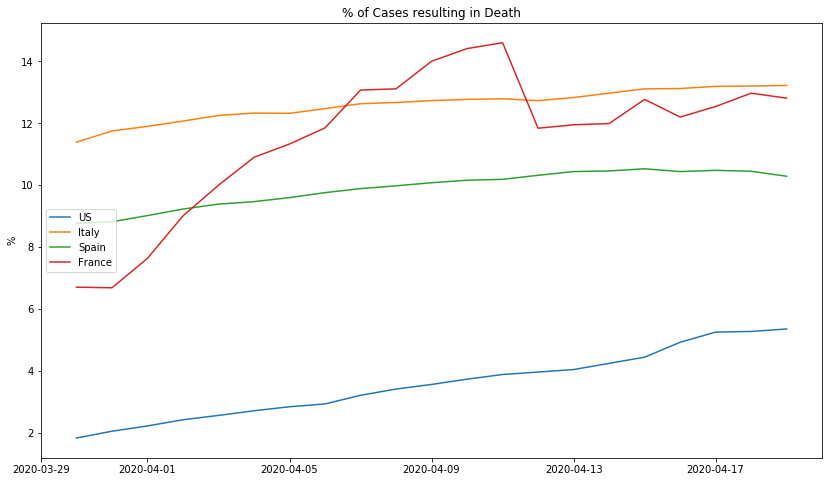

In [4]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

maxdays = 21
maxctys = 15
countries = ['US','Italy','Spain','France']

df_gfat = dfc_g.copy()

for col in df_gfat.columns:
    df_gfat[col] = (dfd_g[col] / df_gfat[col]).mul(100).round(2)
df_gfat = df_gfat.fillna(0)
display(df_gfat.tail())
    
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('% of Cases resulting in Death')
ax1.set_ylabel('%')  # we already handled the x-label with ax1
lines2 = ax1.plot(df_gfat.tail(maxdays).index, df_gfat.tail(maxdays)[countries])
for c,line in enumerate(lines2):
    line.set_label(countries[c])    
ax1.legend(loc='center left')
plt.show()

plt.show()


,2020-04-19 00:00:00 %
Country/Region,
Belgium,14.76
Algeria,14.26
United Kingdom,13.28
Italy,13.22
France,12.81
Netherlands,11.26
Sweden,10.71
Spain,10.29
Hungary,9.86


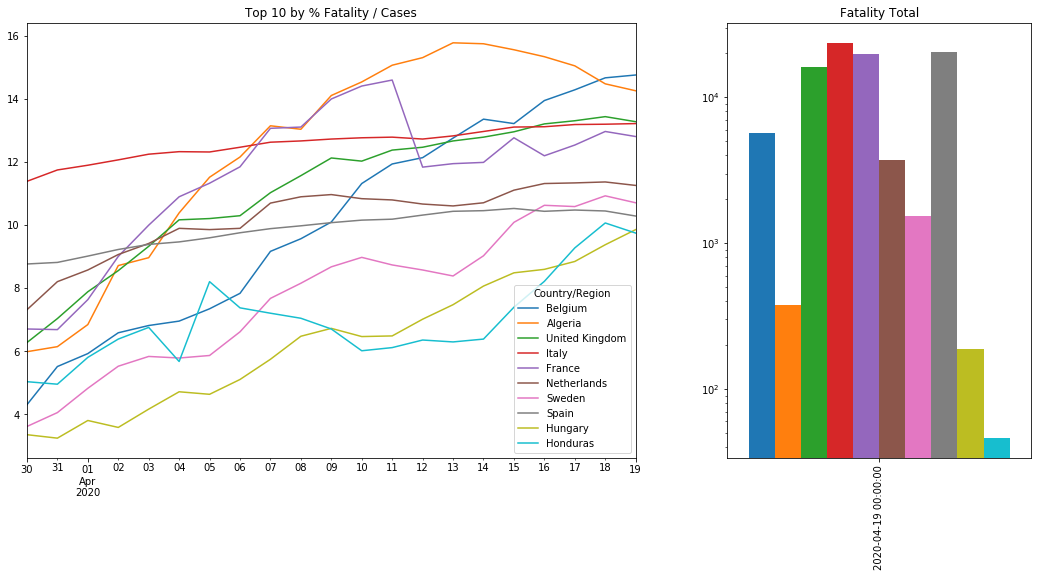

In [5]:
minct = 100
maxdays = 21
maxctys = 10

# sorted only if death count > 100, must transpose first to filter by row
df_gfat2 = dfc_g.copy().transpose()
df_gfat2 = df_gfat2[df_gfat2[df_gfat2.columns[-1]] > minct].transpose()

for col in df_gfat2.columns:
    df_gfat2[col] = (dfd_g[col] / df_gfat2[col]).mul(100).round(2)
df_gfat2 = df_gfat2.fillna(0)
df_gfat2 = df_gfat2.sort_values(df_gfat2.iloc[-1:,:].index.values[0], axis=1, ascending=False)   # column order seems to control legend order
# display(df_gfat2)

dfd_g2 = df_gfat2.copy()  # to hold deaths
for col in dfd_g2.columns:
    dfd_g2[col] = dfd_g[col]
dfd_g2 = dfd_g2.fillna(0)
# display(dfd_g2)

fig, axs = plt.subplots(1,2, sharex=False, figsize=(18,8), gridspec_kw={'width_ratios': [2, 1]})

df_gfat2.iloc[:,0:maxctys].tail(maxdays).plot(ax=axs[0], title='Top 10 by % Fatality / Cases')
dfd_g2.iloc[:,0:maxctys].tail(1).plot(kind='bar',width=3, ax=axs[1], title='Fatality Total', logy=True)
axs[1].get_legend().remove()

display(df_gfat2.iloc[-1:,:].transpose().head(maxctys).rename(columns=lambda x: str(x) + ' %'))


# Lame Stuff Overlay w/ S&P500 from Yahoooo 

In [6]:
#yahoo S&P
sp_df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1581897600&period2=1609372800&interval=1d&events=history')
sp_df = sp_df.set_index('Date')

# create a single table w/ close, states, totalcases
merged_df = pd.merge(left=dfc_g, right=sp_df, left_index=True, right_index=True, how='left')
merged_df = merged_df.fillna(method='backfill')  # fill weekends blanks
merged_df['Global'] = merged_df[merged_df.columns[0:50]].sum(axis=1)

merged_df[['Close','Open','High','Low','US','Iran','Italy','Spain','China','Japan','Global']].tail()

,Close,Open,High,Low,US,Iran,Italy,Spain,China,Japan,Global
2020-04-15,2783.360107,2795.639893,2801.879883,2761.540039,636350,76389,165155,177644,83356,8100,1993292
2020-04-16,2799.550049,2799.340088,2806.510010,2764.320068,667592,77995,168941,184948,83403,8626,2086368
2020-04-17,2874.560059,2842.429932,2879.219971,2830.879883,699706,79494,172434,190839,83760,9787,2170890
2020-04-18,NaN,NaN,NaN,NaN,732197,80868,175925,191726,83787,10296,2245470
2020-04-19,NaN,NaN,NaN,NaN,759086,82211,178972,198674,83805,10797,2326072


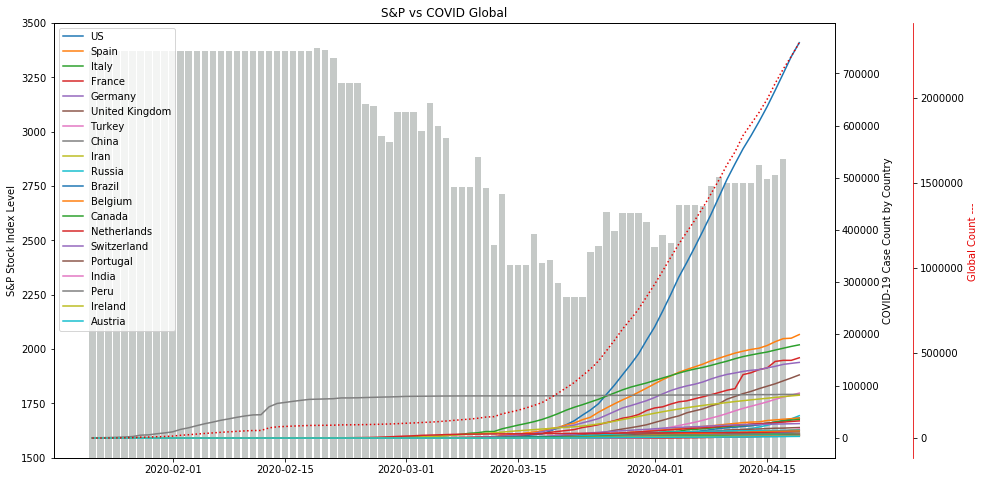

In [7]:
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('S&P vs COVID Global')

ax1.set_ylabel('S&P Stock Index Level')  # we already handled the x-label with ax1
ax1.set(ylim=[1500, 3500]) 
ax1.bar(merged_df.index, merged_df['Close'], color='xkcd:silver')

ax2 = ax1.twinx()
ax2.set_ylabel('COVID-19 Case Count by Country')  # we already handled the x-label with ax1
lines = ax2.plot(merged_df.index, merged_df[merged_df.columns[0:50]])
for c,line in enumerate(lines[0:20]):
    line.set_label(merged_df.columns[c])
ax2.legend(loc='upper left')

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.spines["right"].set_color('xkcd:red')
ax3.set_ylabel('Global Count --- ', color='xkcd:red')  
ax3.plot(merged_df.index, merged_df['Global'], color='xkcd:red', linestyle=':')
plt.show()


# More Overlaps (Cases - Deaths) - WIP

2020-01-22     555
2020-01-23     654
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
dtype: int64

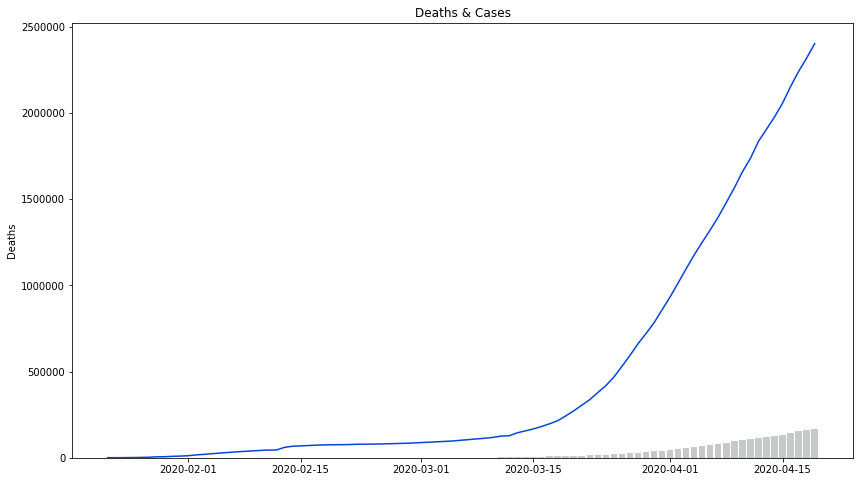

In [8]:
# more overlays -- lets try -- deaths bar, cases line1
dfd_gt = dfd_g.transpose() 
dfc_gt = dfc_g.transpose()

#plotting overlays fun 
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('Deaths & Cases')

dfc_gsum = dfc_g.sum(axis=1)
dfd_gsum = dfd_g.sum(axis=1)
display(dfc_gsum.head())

ax1.set_ylabel('Deaths')  # we already handled the x-label with ax1
ax1.bar(dfd_gsum.index, dfd_gsum, color='xkcd:silver')
ax1.plot(dfc_gsum.index, dfc_gsum, color='xkcd:blue')

plt.show()


## Top N-Countries by total cases..


In [9]:
maxdays = 10
maxctys = 15

dfd_g2 = dfd_g.transpose()
dfc_g2 = dfc_g.transpose()
display('top countries', dfc_g2.sort_values(by=[dfc_g2.columns[-1]], ascending=False).head(maxctys).iloc[:,-maxdays:])
display('top countries d', dfd_g2.sort_values(by=[dfd_g2.columns[-1]], ascending=False).head(3).iloc[:,-maxdays:])

'top countries'

,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19
Country/Region,,,,,,,,,,
US,496535,526396,555313,580619,607670,636350,667592,699706,732197,759086
Spain,158273,163027,166831,170099,172541,177644,184948,190839,191726,198674
Italy,147577,152271,156363,159516,162488,165155,168941,172434,175925,178972
France,91738,94863,121712,125394,131361,134582,147091,149130,149149,154097
Germany,122171,124908,127854,130072,131359,134753,137698,141397,143342,145184
United Kingdom,74605,79874,85206,89570,94845,99483,104145,109769,115314,121172
Turkey,47029,52167,56956,61049,65111,69392,74193,78546,82329,86306
China,82941,83014,83134,83213,83306,83356,83403,83760,83787,83805
Iran,68192,70029,71686,73303,74877,76389,77995,79494,80868,82211


'top countries d'

,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19
Country/Region,,,,,,,,,,
US,18586,20462,22019,23528,25831,28325,32916,36773,38664,40661
Italy,18849,19468,19899,20465,21067,21645,22170,22745,23227,23660
Spain,16081,16606,17209,17756,18056,18708,19315,20002,20043,20453


## Random analysis of various countries

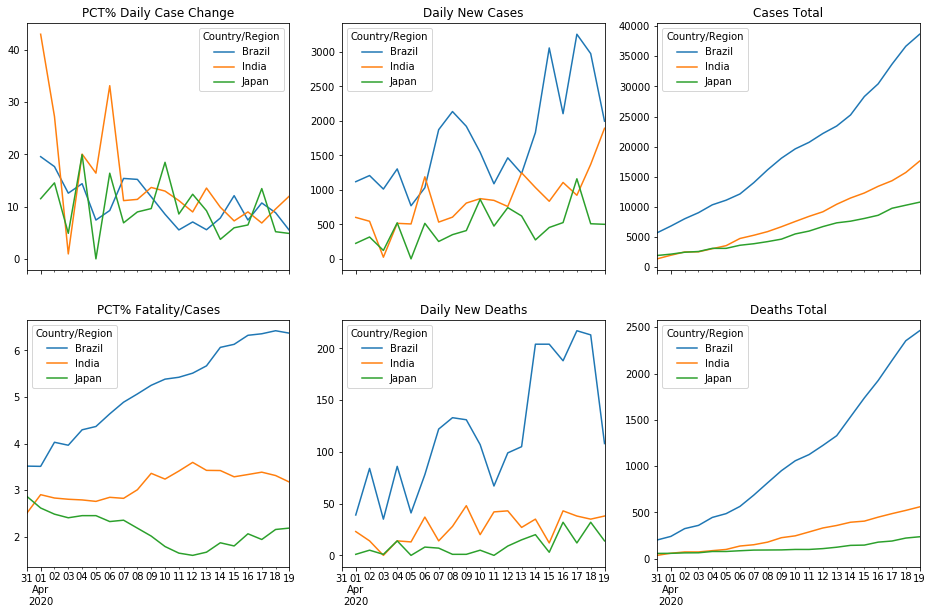

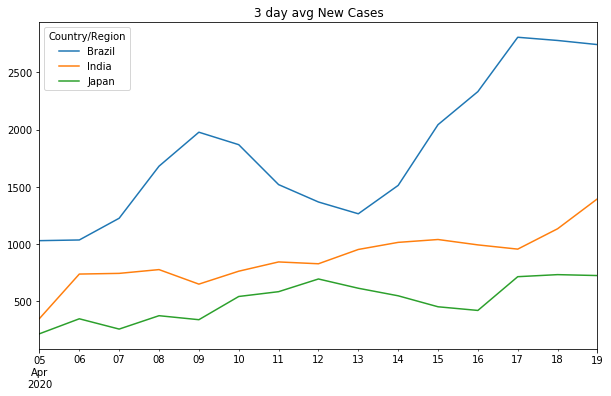

In [10]:
# ad hoc overlays
countries = ['Japan','Singapore','Thailand','Vietnam','India','Korea, South','Pakistan']
countries = ['Japan', 'India','Brazil']
maxdays = 20

fig, axs = plt.subplots(2,3, figsize=(16, 10), sharex=True)
dfc_g3 = dfc_g2.transpose().tail(maxdays).transpose().sort_index()
dfd_g3 = dfd_g2.transpose().tail(maxdays).transpose().sort_index()

pctline = dfc_g3[dfc_g3.index.isin(countries)].pct_change(axis=1).transpose().mul(100).plot(ax=axs[0,0], title='PCT% Daily Case Change')
chgline = dfc_g3[dfc_g3.index.isin(countries)].diff(axis=1).transpose().plot(ax=axs[0,1], title='Daily New Cases')
actline = dfc_g3[dfc_g3.index.isin(countries)].tail(maxdays).transpose().plot(ax=axs[0,2], title='Cases Total')

#i'd like to get the colors to be the same... 
pctline = (dfd_g3[dfd_g3.index.isin(countries)]/dfc_g3[dfc_g3.index.isin(countries)]).transpose().mul(100).plot(ax=axs[1,0], title='PCT% Fatality/Cases')
chgline = dfd_g3[dfd_g3.index.isin(countries)].diff(axis=1).transpose().plot(ax=axs[1,1], title='Daily New Deaths')
actline = dfd_g3[dfd_g3.index.isin(countries)].transpose().plot(ax=axs[1,2], title='Deaths Total')
plt.show()


roll = dfc_g3[dfc_g3.index.isin(countries)].diff(axis=1).transpose().rolling(3, axis=0).mean().round(0)
roll.tail(maxdays-5).plot(figsize=(10,6), title='3 day avg New Cases')


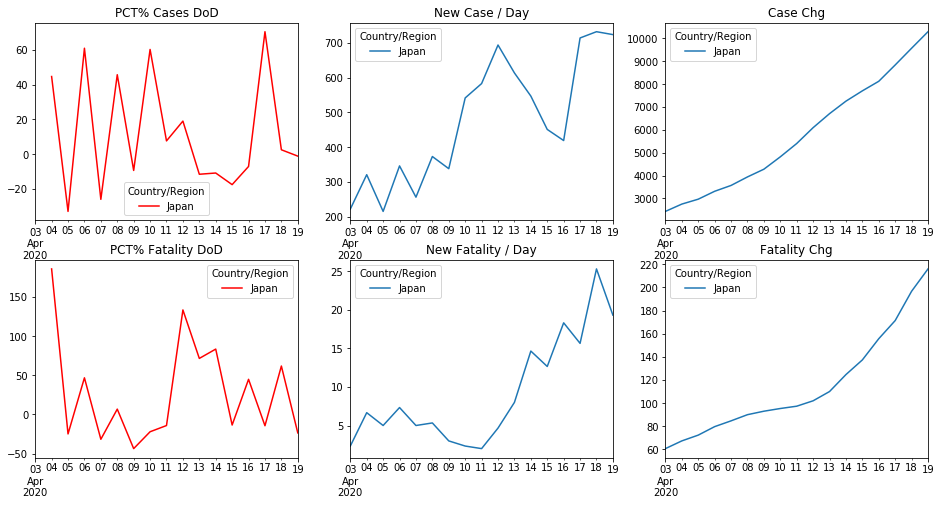

Country/Region,Japan
2020-04-15,-0.175610
2020-04-16,-0.071006
2020-04-17,0.705414
2020-04-18,0.025210
2020-04-19,-0.011384


Country/Region,Japan
2020-04-15,-0.136364
2020-04-16,0.447368
2020-04-17,-0.145455
2020-04-18,0.617021
2020-04-19,-0.236842


In [11]:
# rolling 3 day to smooth out 
countries = ['Japan']
maxdays3 = maxdays-3  # trim the rolling/diff 3 days

fig, axs = plt.subplots(2,3, figsize=(16, 8), sharex=False, )

dfd_g2r = dfd_g3.rolling(window=3, axis=1).mean().sort_index()
dfc_g2r = dfc_g3.rolling(window=3, axis=1).mean().sort_index()

colors=['Red','Orange','Blue','Green']
pctline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays3).mul(100).plot(ax=axs[0,0], title='PCT% Cases DoD', color=colors)
chgline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).transpose().tail(maxdays3).plot(ax=axs[0,1], title='New Case / Day')
actline = dfc_g2r[dfc_g2r.index.isin(countries)].transpose().tail(maxdays3).plot(ax=axs[0,2], title='Case Chg')

pctline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays3).mul(100).plot(ax=axs[1,0], title='PCT% Fatality DoD' ,color=colors)
chgline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).transpose().tail(maxdays3).plot(ax=axs[1,1], title='New Fatality / Day')
actline = dfd_g2r[dfd_g2r.index.isin(countries)].transpose().tail(maxdays3).plot(ax=axs[1,2], title='Fatality Chg')
plt.show()

display(dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail())
display(dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail())


# Rival Countries

Country/Region,India,Poland,Sweden
2020-04-15,12322,7582,11927
2020-04-16,13430,7918,12540
2020-04-17,14352,8379,13216
2020-04-18,15722,8742,13822
2020-04-19,17615,9287,14385


Country/Region,India,Poland,Sweden
2020-04-15,405,286,1203
2020-04-16,448,314,1333
2020-04-17,486,332,1400
2020-04-18,521,347,1511
2020-04-19,559,360,1540


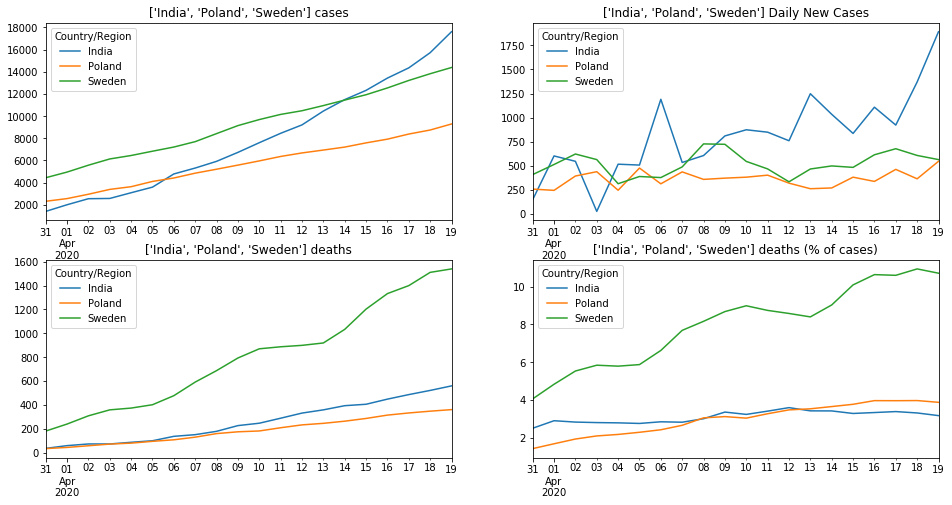

In [12]:
maxdays = 20
countries = ['India','Poland','Sweden']

fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=False )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].diff().tail(maxdays).plot(title=str(countries)+' Daily New Cases', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))


Country/Region,Belgium,Netherlands,Luxembourg
2020-04-15,33573,28316,3373
2020-04-16,34809,29383,3444
2020-04-17,36138,30619,3480
2020-04-18,37183,31766,3537
2020-04-19,38496,32838,3550


Country/Region,Belgium,Netherlands,Luxembourg
2020-04-15,4440,3145,69
2020-04-16,4857,3327,69
2020-04-17,5163,3471,72
2020-04-18,5453,3613,72
2020-04-19,5683,3697,73


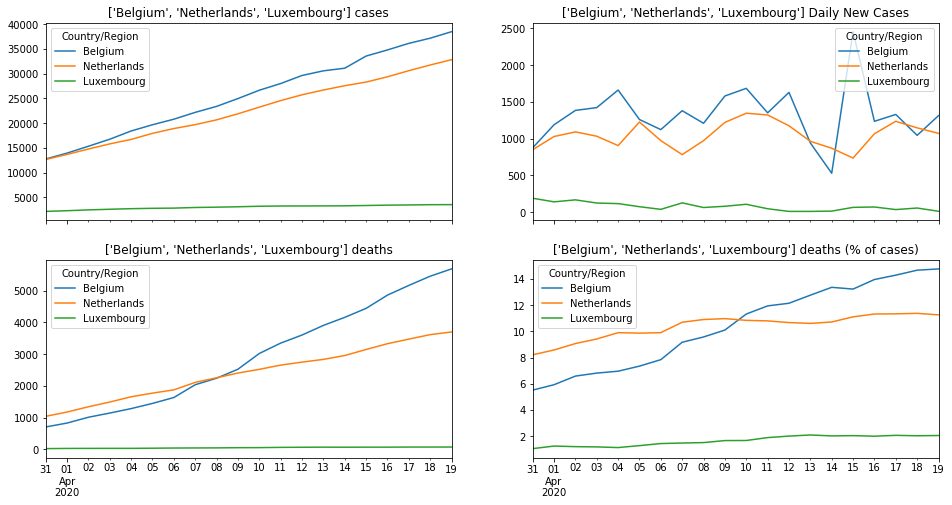

In [13]:
# benelux
maxdays = 20
countries = ['Belgium','Netherlands','Luxembourg']


fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=True, )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].diff().tail(maxdays).plot(title=str(countries)+' Daily New Cases', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))

Country/Region,Finland,Norway,Sweden
2020-04-15,3237,6740,11927
2020-04-16,3369,6896,12540
2020-04-17,3489,6937,13216
2020-04-18,3681,7036,13822
2020-04-19,3783,7078,14385


Country/Region,Finland,Norway,Sweden
2020-04-15,72,150,1203
2020-04-16,75,152,1333
2020-04-17,82,161,1400
2020-04-18,90,164,1511
2020-04-19,94,165,1540


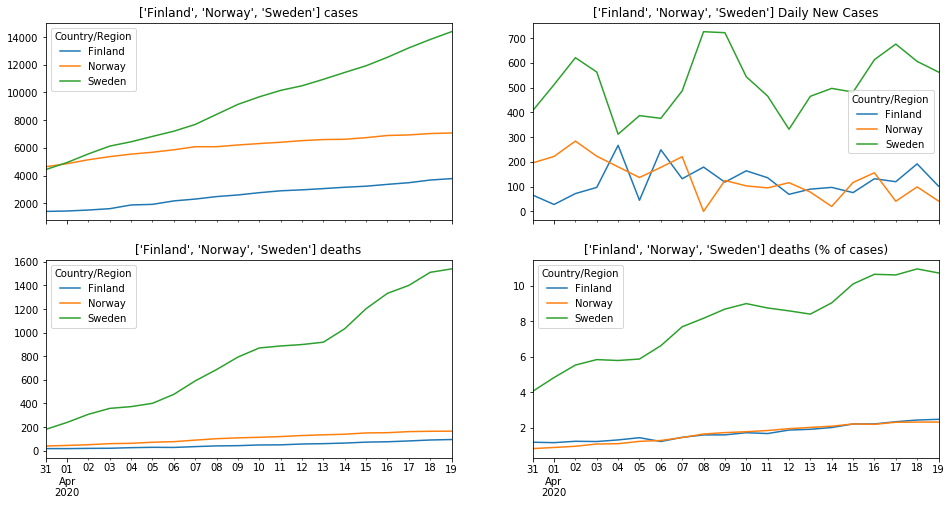

In [14]:
# nordics
maxdays = 20
countries = ['Finland','Norway','Sweden']


fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=True, )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].diff().tail(maxdays).plot(title=str(countries)+' Daily New Cases', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))


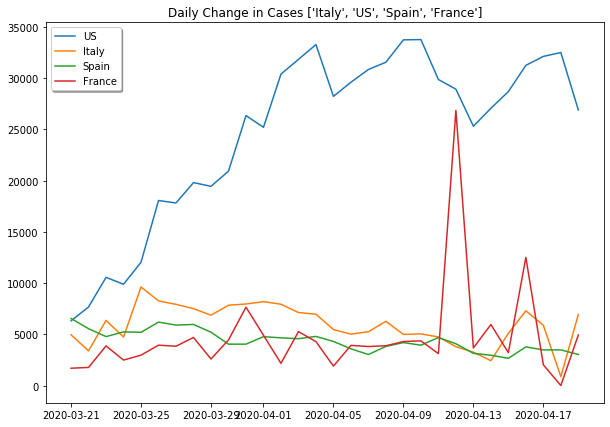

Country/Region,US,Spain,Italy,France
2020-04-15,28680.0,5103.0,2667.0,3221.0
2020-04-16,31242.0,7304.0,3786.0,12509.0
2020-04-17,32114.0,5891.0,3493.0,2039.0
2020-04-18,32491.0,887.0,3491.0,19.0
2020-04-19,26889.0,6948.0,3047.0,4948.0


In [15]:
# global rate
maxdays = 30
countries = ['Italy','US','Spain','France']
sorthack = ['US','Italy','Spain','France']

dfc_gdiff= dfc_g.transpose().sum().diff()

plt.figure(figsize=(10,7)) 
plt.plot(dfc_g2[dfc_g2.index.isin(countries)].diff(axis=1).transpose().tail(maxdays))
# plt.plot(dfc_gdiff.tail(30))
plt.legend(sorthack, loc='upper left', shadow=True)  # bit of pain to name these manually in order
plt.title('Daily Change in Cases '+str(countries))

plt.show()
display(dfc_g2[dfc_g2.index.isin(countries)].diff(axis=1).transpose().tail(5))


,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19
Country/Region,,,,,,,,,,
US,462789.0,495237.0,526081.0,554109.0,581201.0,608213.0,637204.0,667883.0,699832.0,730330.0
Spain,153238.0,158174.0,162710.0,166652.0,169824.0,173428.0,178378.0,184477.0,189171.0,193746.0
Italy,143542.0,147825.0,152070.0,156050.0,159456.0,162386.0,165528.0,168843.0,172433.0,175777.0
France,87387.0,91322.0,102771.0,113990.0,126156.0,130446.0,137678.0,143601.0,148457.0,150792.0
Germany,117883.0,121753.0,124978.0,127611.0,129762.0,132061.0,134603.0,137949.0,140812.0,143308.0
United Kingdom,67317.0,73450.0,79895.0,84883.0,89874.0,94633.0,99491.0,104466.0,109743.0,115418.0
China,82878.0,82946.0,83030.0,83120.0,83218.0,83292.0,83355.0,83506.0,83650.0,83784.0
Turkey,42512.0,47159.0,52051.0,56724.0,61039.0,65184.0,69565.0,74044.0,78356.0,82394.0
Iran,66333.0,68147.0,69969.0,71673.0,73289.0,74856.0,76420.0,77959.0,79452.0,80858.0


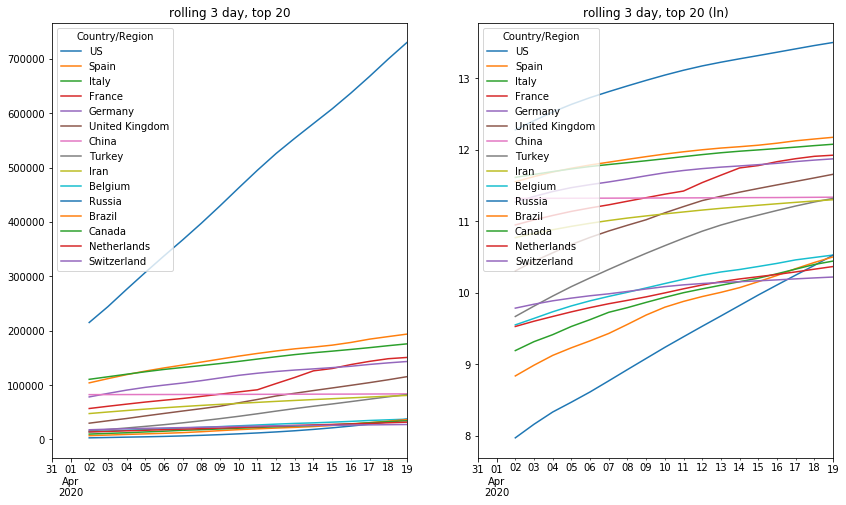

In [16]:
# rolling 3 day average highs
fig, axs = plt.subplots(1,2)

df_roll = dfc_g3.rolling(3,axis=1,center=False).mean().round()
df_roll = df_roll.sort_values(by=[df_roll.columns[-1]], ascending=False).head(15)
display(df_roll.iloc[:,-10:])
df_roll.iloc[:,-28:].transpose().plot(figsize=(14,8),title='rolling 3 day, top 20',ax=axs[0])
df_roll.iloc[:,-28:].transpose().apply(np.log).plot(figsize=(14,8),title='rolling 3 day, top 20 (ln)',ax=axs[1])



# Global Population Comparisons

In [24]:
# GLobal Population 
# https://github.com/datasets/population/blob/master/data/population.csv

df_gpop = pd.read_csv('https://raw.githubusercontent.com/datasets/population/master/data/population.csv')
df_gpop_2016 = df_gpop[df_gpop['Year'] == 2016]
df_gpop_2016 = df_gpop_2016.rename(columns={'Country Name': 'Country/Region'})

display(df_gpop_2016.shape, df_gpop_2016.head(3), dfc_g.transpose().shape, dfc_g.tail(1).transpose().head(3))  #262 countries

df_gmerged = pd.merge(left=dfc_g.tail(1).transpose(), right=df_gpop_2016, on='Country/Region', how='outer')
df_gmerged = df_gmerged.rename(columns={df_gmerged.columns[1]:'Cases', 'Value':'Population'})
df_gmerged['% of pop'] = (df_gmerged['Cases'] / df_gmerged['Population']).mul(100).round(2)

dfd_gmerged = pd.merge(left=dfd_g.tail(1).transpose(), right=df_gpop_2016, on='Country/Region', how='outer')
dfd_gmerged = dfd_gmerged.rename(columns={dfd_gmerged.columns[1]:'Deaths', 'Value':'Population'})
dfd_gmerged['% of pop'] = (dfd_gmerged['Deaths'] / dfd_gmerged['Population']).mul(100).round(2)

display(df_gmerged.shape, df_gmerged.sort_values(by=['% of pop'], ascending=False).head())
display(dfd_gmerged.shape, dfd_gmerged.sort_values(by=['% of pop'], ascending=False).head(10).drop(columns=['Country Code','Year']))


(262, 4)

,Country/Region,Country Code,Year,Value
56,Arab World,ARB,2016,404024433
115,Caribbean small states,CSS,2016,7269386
174,Central Europe and the Baltics,CEB,2016,102994343


(185, 89)

,2020-04-19
Country/Region,
US,759086
Spain,198674
Italy,178972


(289, 6)

,Country/Region,Cases,Country Code,Year,Population,% of pop
100,San Marino,461.0,SMR,2016.0,33504.0,1.38
86,Andorra,713.0,AND,2016.0,77297.0,0.92
48,Luxembourg,3550.0,LUX,2016.0,582014.0,0.61
62,Iceland,1771.0,ISL,2016.0,335439.0,0.53
1,Spain,198674.0,ESP,2016.0,46484062.0,0.43


(289, 6)

,Country/Region,Deaths,Population,% of pop
66,San Marino,39.0,33504.0,0.12
5,Belgium,5683.0,11331422.0,0.05
69,Andorra,36.0,77297.0,0.05
1,Italy,23660.0,60627498.0,0.04
2,Spain,20453.0,46484062.0,0.04
3,France,19744.0,66721256.0,0.03
4,United Kingdom,16095.0,65611593.0,0.02
9,Netherlands,3697.0,17030314.0,0.02
13,Sweden,1540.0,9923085.0,0.02
14,Switzerland,1393.0,8373338.0,0.02


C:\Users\dougc\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: `item` has been deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()
C:\Users\dougc\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version


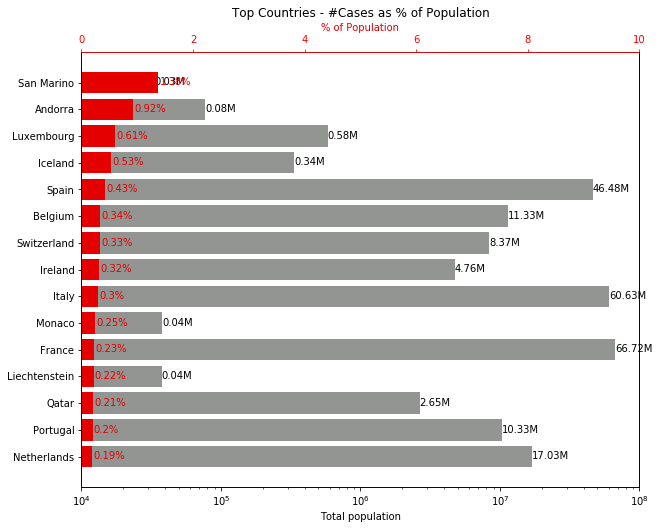

In [18]:
max_ctys = 15
fig,ax1 = plt.subplots(figsize=(10, 8)) 

df_gmerged_h = df_gmerged.sort_values(by=['% of pop'],ascending=False).head(max_ctys)

ax1.set_xscale('log')
ax1.set(xlim=[10**4, 10**8])   # get max min +/- buffer
ax1.set_xlabel('Total population')  
ax1.barh(df_gmerged_h['Country/Region'], df_gmerged_h['Population'], color='xkcd:grey')
for n,i in enumerate(ax1.patches):
    ax1.text(i.get_width()+.02, i.get_y()+.5,str(df_gmerged_h['Population'].div(1000000).round(2).iloc[n:n+1].item()) + 'M', color='xkcd:black')

    
ax2 = ax1.twiny()
ax2.set_xscale('linear')
ax2.set(xlim=[0, 10])   # get max min +/- buffer
ax2.set_xlabel('% of Population', color='xkcd:red')  
ax2.spines['top'].set_color('red')
ax2.tick_params(axis='x', colors='red')
ax2.barh(df_gmerged_h['Country/Region'], df_gmerged_h['% of pop'], color='xkcd:red')
for n,i in enumerate(ax2.patches):
    ax2.text(i.get_width()+.02, i.get_y()+.5,str(df_gmerged_h['% of pop'].iloc[n:n+1].item()) + '%', color='xkcd:red')
plt.title('Top Countries - #Cases as % of Population')
plt.gca().invert_yaxis()
plt.show()

# Emerging Markets (>100 cases)

In [19]:
# EMERGING markets - > 100 but not biggest
minct = 100

dfc_g3 = dfc_g2.diff(axis=1)
dfc_g3.columns = pd.to_datetime(dfc_g3.columns)
dfc_g3p = dfc_g2.pct_change(axis=1).mul(100).round()
dfc_g3p.columns = pd.to_datetime(dfc_g3p.columns)

dfc_merge = pd.merge(left=dfc_g2, right=dfc_g3p, left_index=True, right_index=True, suffixes=('',' %chg'))
# weird it goes to timestamp now
dfc_merge = dfc_merge.reindex(sorted(dfc_merge.columns), axis=1)
dfc_merge = dfc_merge[dfc_merge[dfc_merge.columns[-2]] > minct]

display('top 20 growth countries, > 100 cases', 
        dfc_merge.sort_values(by=dfc_merge.columns[-1], ascending=False).head(20).iloc[:,-6:].rename(columns=lambda x: x.replace('00:00:00','').replace('2020-','')))


'top 20 growth countries, > 100 cases'

,04-17,04-17 %chg,04-18,04-18 %chg,04-19,04-19 %chg
Country/Region,,,,,,
Ghana,641,0.0,834,30.0,1042,25.0
Somalia,116,45.0,135,16.0,164,21.0
Tanzania,147,56.0,147,0.0,170,16.0
Djibouti,732,24.0,732,0.0,846,16.0
Russia,32008,15.0,36793,15.0,42853,16.0
Nigeria,493,12.0,542,10.0,627,16.0
Bangladesh,1838,17.0,2144,17.0,2456,15.0
Venezuela,204,0.0,227,11.0,256,13.0
Burma,88,4.0,98,11.0,111,13.0


# Global Heatmap (Using Shape Files) - WIP


I wanted to map by country, but need to find a country equivalent of a FIPS code (or match by country name to a map file).

Another way is to use GPS (Long/Lat) geocordinates and a Map (shape file).   However my global data is sometimes clumped into one lat/long for some countrues like Japan and US, and detailed locations in places like France.

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,last
107,France,3.9339,-53.1258,0,0,0,0,0,0,0,...,83,86,86,86,86,86,96,96,96,96
108,France,-17.6797,149.4068,0,0,0,0,0,0,0,...,51,53,55,55,55,55,55,55,55,55
109,France,16.2500,-61.5833,0,0,0,0,0,0,0,...,143,143,143,145,145,145,145,148,148,148
110,France,-12.8275,45.1662,0,0,0,0,0,0,0,...,196,196,207,217,217,233,245,254,271,271
111,France,-20.9043,165.6180,0,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
112,France,-21.1351,55.2471,0,0,0,0,0,0,0,...,388,389,391,391,391,394,402,407,408,408
113,France,17.9000,-62.8333,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
114,France,18.0708,-63.0501,0,0,0,0,0,0,0,...,32,32,32,32,35,35,35,37,37,37
115,France,14.6415,-61.0242,0,0,0,0,0,0,0,...,155,155,157,157,158,158,158,158,163,163
116,France,46.2276,2.2137,0,0,2,3,3,3,4,...,93790,120633,124298,130253,133470,145960,147969,147969,152894,152894


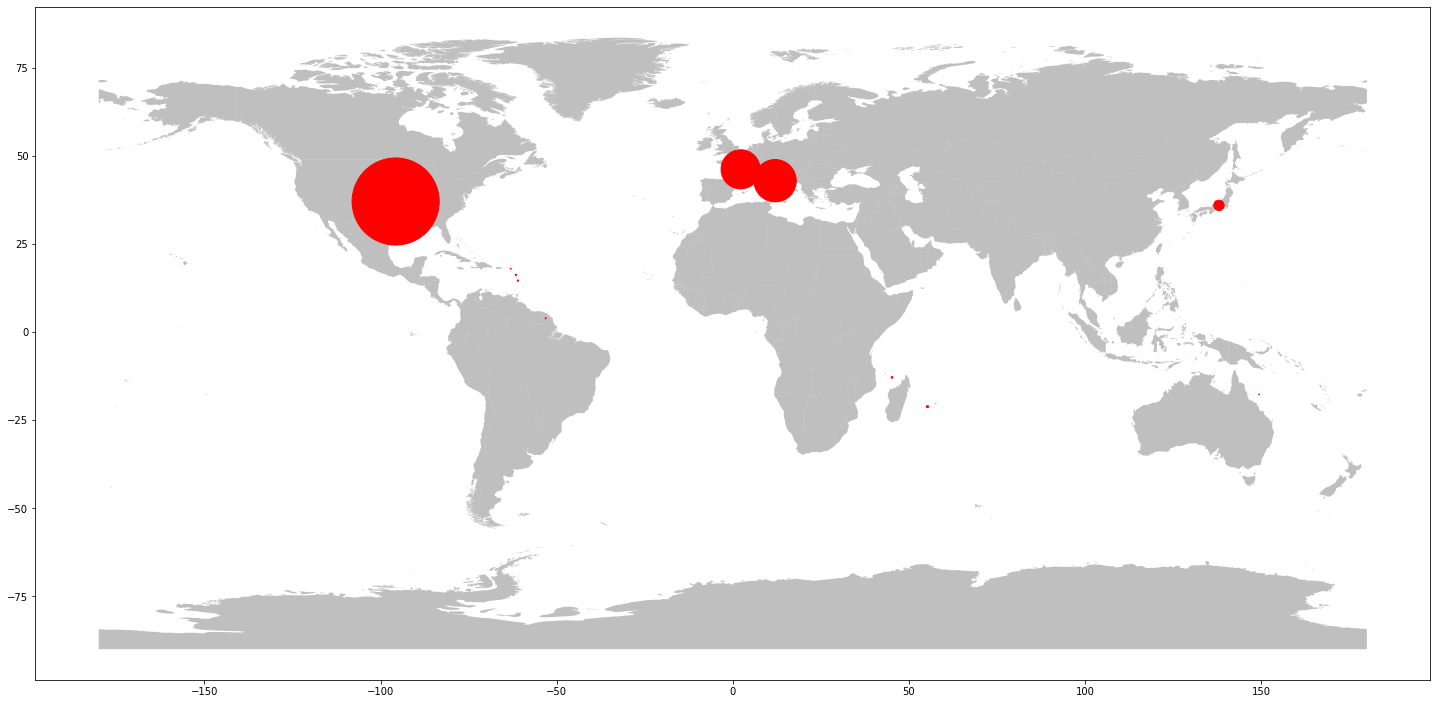

In [20]:
# country shape file https://hub.arcgis.com/datasets/UIA::uia-latitude-longitude-graticules-and-world-countries-boundaries?geometry=-144.961%2C-72.317%2C-179.414%2C79.981&layer=1
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

gmap = gpd.read_file('maps/Countries_WGS84.shp')

# remove hi/ak for now
dfc_geo = dfc_graw.drop(columns=['Province/State'])
dfc_geo['last'] = dfc_geo[dfc_geo.columns[-1]]
dfc_geo = dfc_geo[dfc_geo['Country/Region'].isin(['US','Italy','Japan','France'])]
display(dfc_geo)


geometry = [Point(xy) for xy in zip(dfc_geo["Long"],dfc_geo["Lat"]) ] 
geo_df = gpd.GeoDataFrame(dfc_geo,crs={"init": "EPSG:7030"},geometry=geometry)
geo_df = geo_df[['Country/Region','last','geometry']]

fig, ax = plt.subplots(figsize=(25,25))
gmap.plot(ax=ax, alpha=0.5, color='grey')

#geo_df.plot(ax=ax, markersize=20, cmap='Reds', label='cases')
geo_df.plot(ax=ax, markersize=dfc_geo['last'].div(100), color='red', label='cases')   # size on last
